# Candleplotwhiskers
Example of candle plot showing the whiskers definition.




**Author:** Georg Troska  
<i><small>This notebook tutorial was automatically generated with <a href= "https://github.com/root-project/root/blob/master/documentation/doxygen/converttonotebook.py">ROOTBOOK-izer</a> from the macro found in the ROOT repository  on Thursday, August 29, 2019 at 01:52 AM.</small></i>

In [1]:
auto c1 = new TCanvas("c1","Candle Presets",700,800);
c1->Divide(1,2);

auto rng = new TRandom();
auto h1 = new TH2I("h1","Gaus",100,-5,5,1,0,1);
auto h2 = new TH1I("h2","Gaus",100,-5,5);

h1->GetXaxis()->SetTitle("Standard deviation #sigma");
h2->GetXaxis()->SetTitle("Standard deviation #sigma");
h2->GetYaxis()->SetTitle("dN/d#sigma");

float myRand;
for (int i = 0; i < 100000; i++) {
    myRand = rng->Gaus(0,1);
    h1->Fill(myRand,0);
    h2->Fill(myRand);
}

Double_t *q = new Double_t[3];
Double_t *p = new Double_t[3];
q[0] = 0.; q[1] = 0.; q[2] = 0.;
p[0] = 0.25; p[1] = 0.5; p[2] = 0.75;

h2->GetQuantiles(3,q,p);
cout << "Q1 (-25%): " << q[0] << " Median: " << q[1] << " Q3 (+25%): " << q[2] << endl;
double iqr = q[2]-q[0];
auto mygaus_1_middle = new TF1("mygaus_1_middle","gaus",q[0],q[2]);
auto mygaus_1_left   = new TF1("mygaus_1_left","gaus",q[0]-1.5*iqr,q[0]);
mygaus_1_left->SetLineColor(kGreen);
auto mygaus_1_right  = new TF1("mygaus_1_right","gaus",q[2],q[2]+1.5*iqr);
mygaus_1_right->SetLineColor(kGreen);
c1->cd(1);
h1->SetLineWidth(3);
h1->SetFillStyle(0);
h1->Draw("candley2 scat");

c1->cd(2);
h2->Draw("");
h2->Fit("mygaus_1_left","R");
mygaus_1_left->Draw("same");
auto l3 = new TLine(q[0]-1.5*iqr,0,q[0]-1.5*iqr,mygaus_1_left->Eval(q[0]-1.5*iqr));
l3->SetLineColor(kGreen); l3->SetLineWidth(2);      l3->Draw("");
auto l1 = new TLine(q[0]        ,0,q[0]        ,mygaus_1_left->Eval(q[0]));
l1->SetLineWidth(2);      l1->SetLineColor(kGreen); l1->Draw("");

h2->Fit("mygaus_1_right","R","");
mygaus_1_right->Draw("same");
auto l4 = new TLine(q[2]+1.5*iqr,0,q[2]+1.5*iqr,mygaus_1_left->Eval(q[2]+1.5*iqr));
l4->SetLineColor(kGreen); l4->SetLineWidth(2);      l4->Draw("");
auto l5 = new TLine(q[2]        ,0,q[2]        ,mygaus_1_right->Eval(q[2]));
l5->SetLineWidth(2);      l5->SetLineColor(kGreen); l5->Draw("");

h2->Fit("mygaus_1_middle","R");
mygaus_1_middle->Draw("same");

Q1 (-25%): -0.675525 Median: 0.00168511 Q3 (+25%): 0.676189
 FCN=11.7941 FROM MIGRAD    STATUS=CONVERGED     138 CALLS         139 TOTAL
                     EDM=1.07888e-12    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     3.72831e+03   1.82108e+02   4.21637e-02   1.35967e-08
   2  Mean        -1.10774e-01   7.20924e-02   8.42717e-06  -1.49232e-04
   3  Sigma        9.59469e-01   2.51500e-02   2.82317e-06   5.36720e-04
 FCN=8.04689 FROM MIGRAD    STATUS=CONVERGED     139 CALLS         140 TOTAL
                     EDM=6.08152e-08    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     4.07186e+03   2.44581e+02   3.87026e-02   3.94850e-07
   2  Mean        -2.92179e-02   8.71839e-02  

In principal one could calculate these values by h2->integral() as well

In [2]:
auto t = new TText(); t->SetTextFont(42);
t->DrawText(0,mygaus_1_middle->Eval(0)/2,"50%");
t->DrawText(-1.5,mygaus_1_middle->Eval(-1.5)/2,"24.65%");
t->DrawText(+1,mygaus_1_middle->Eval(+1.5)/2,"24.65%");
t->DrawText(q[0]-1.5*iqr,1000,Form("%.3f",q[0]-1.5*iqr))->SetTextAngle(90);
t->DrawText(q[2]+1.5*iqr,1000,Form("%.3f",q[2]+1.5*iqr))->SetTextAngle(90);
t->DrawText(q[0],1000,Form("%.3f",q[0]))->SetTextAngle(90);
t->DrawText(q[2],1000,Form("%.3f",q[2]))->SetTextAngle(90);

Draw all canvases 

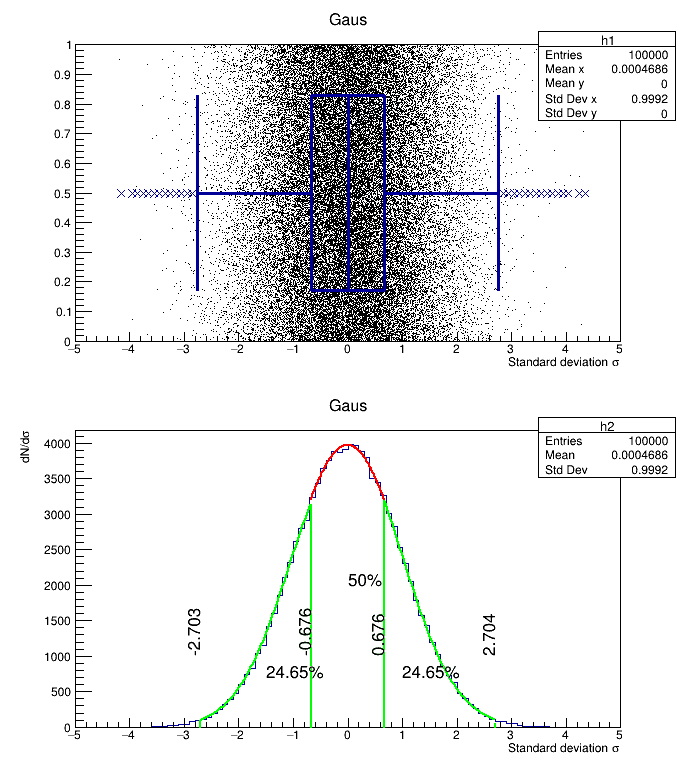

In [3]:
gROOT->GetListOfCanvases()->Draw()